## Introduccion

Este cuaderno se enfoca en la **retención de empleados**, un aspecto fundamental para cualquier empresa, ya que la rotación de personal (desgaste) puede generar altos costos y desafíos para reemplazar talento y experiencia. Utilizando un conjunto de datos de **IBM**, se llevará a cabo un **análisis exploratorio de datos (EDA)** y un proceso de **preprocesamiento** para preparar los datos para análisis más avanzados.

Durante el EDA, se explorarán las principales características del conjunto de datos:

1.  Se importará  archivo de datos con infooramcion limpia y transformada
2.  Se Visualizaran las relaciones entre Variables
3.  Análisis de Interacciones
4.  Diagramas de Caja para Variables Categóricas


Fuente de datos : https://www.kaggle.com/code/mrshih/attention-to-retention-ibm-data

## Importacíon de librerias

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.tools as tls # Import the plotly.tools module and alias it as tls
import plotly.graph_objs as go # Import plotly.graph_objs for using graph objects like Histogram and Scatter
import plotly.io as pio


##  Carga de Datos

In [63]:
datos = pd.read_csv('C:\Clases _ Phyton\IBM_DATOS_LIMPIOS')

##  Visualizando Relaciones entre Variables : Análisis de Correlaciones
Matriz de Correlación
Calcular la matriz de correlación para variables numéricas.Sirve para entender las relaciones entre variables numéricas es crucial, especialmente cuando se está preparando para un modelo predictivo.

In [64]:
# Seleccionar solo columnas numéricas
columnas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

Matriz de Correlacion:

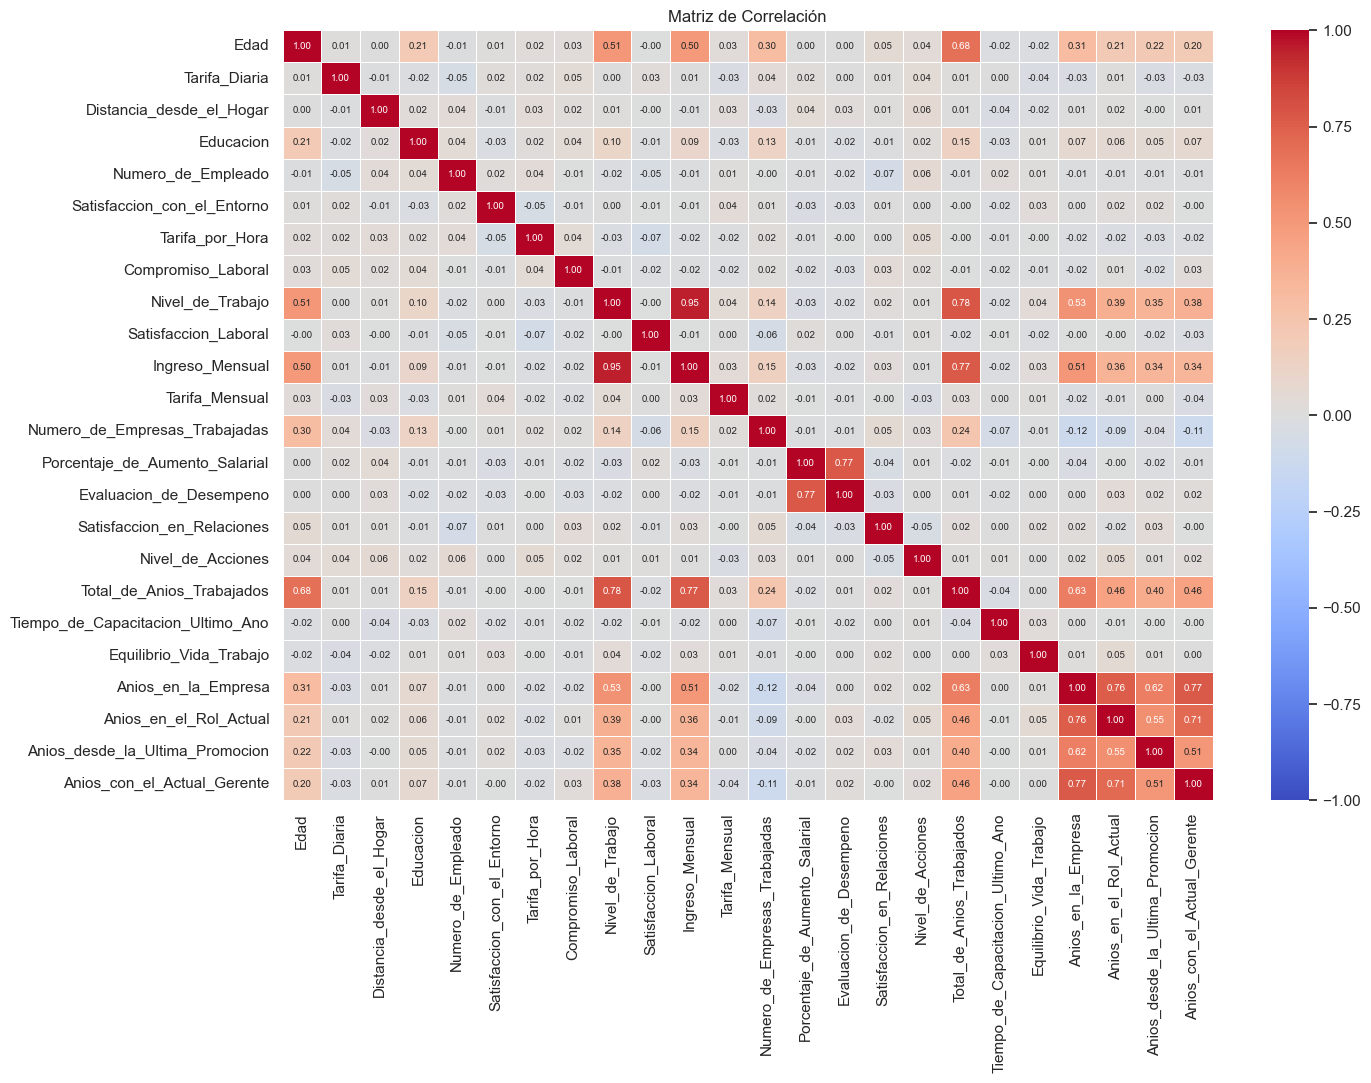

In [65]:
# Calcular la matriz de correlación
correlacion = datos[columnas_numericas].corr()

# Graficar un heatmap de la matriz de correlación

"""
1_ sns.heatmap(): Esta función de Seaborn se utiliza para crear mapas de calor.
2_ correlacion: Se asume que correlacion es una matriz de correlación, es decir,
una matriz cuadrada que muestra la relación entre pares de variables.
3_ annot=True: Este argumento indica que se deben mostrar los valores de
 correlación en cada celda del mapa de calor.
4_ cmap='coolwarm': Este argumento especifica el esquema de colores que se
utilizará para representar los valores de correlación. En este caso, se
utiliza el esquema "coolwarm", que va desde el azul (correlación negativa)
hasta el rojo (correlación positiva).
5_ fmt=".2f": Este argumento controla el formato de los valores de correlación
que se muestran en las celdas. En este caso, se formatea para mostrar dos decimales.
6_ vmin=-1: Este argumento establece el valor mínimo del rango de colores que se
utilizará en el mapa de calor. En este caso, se establece en -1,
lo que significa que los valores de correlación más negativos se
representarán con el color más azul.
7_ vmax=1: Este argumento establece el valor máximo del rango de colores que se -
utilizará en el mapa de calor. En este caso, se establece en 1, lo que
significa que los valores de correlación más positivos se representarán
con el color más rojo.
"""
plt.figure(figsize=(15, 10))  # Aumentar el tamaño de la figura
sns.heatmap(correlacion,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            xticklabels=correlacion.columns,
            yticklabels=correlacion.index,
            annot_kws={"size": 7},  # Reducir el tamaño de la fuente de los anotaciones
            linewidths=0.7)  # Aumentar el espacio entre las celdas
plt.title('Matriz de Correlación')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y horizontales
plt.show()


Mapa de calor de la correlacion

In [66]:
numeric_cols = datos.select_dtypes(include=['int64', 'float64'])

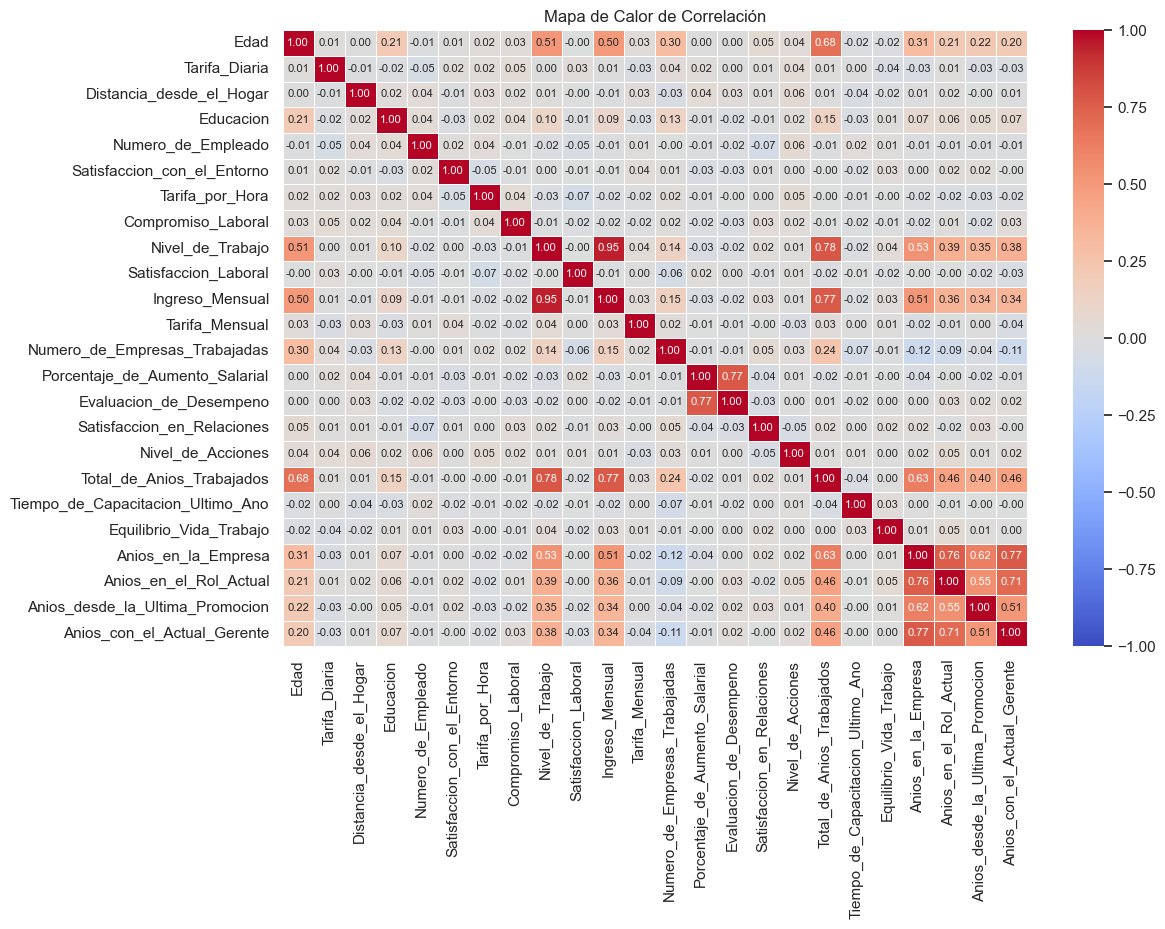

In [67]:
if numeric_cols.empty:
    print("No hay columnas numéricas para generar el mapa de calor.")
else:
    # Genera el mapa de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_cols.corr(),
                annot=True,
                fmt=".2f",
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                xticklabels=correlacion.columns,
                yticklabels=correlacion.index,
                annot_kws={"size": 8},  # Reducir el tamaño de la fuente de los anotaciones
                linewidths=0.5)  # Aumentar el espacio entre las celdas
    plt.title('Mapa de Calor de Correlación')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
    plt.yticks(rotation=0)  # Mantener las etiquetas del eje y horizontales
    plt.show()




Observando el mapa  y la matriz de correlación muestran algunas ideas interesantes sobre cómo se relacionan diferentes aspectos del trabajo de los empleados :

1. Las personas más jóvenes suelen estar en cargos más altos y, en general, tienden a estar menos satisfechas.
  
2. Los empleados que llevan más tiempo en una empresa tienden a estar en el mismo puesto por más tiempo y han sido promovidos hace más tiempo.
  
3. Los empleados con mejores evaluaciones y que han recibido aumentos salariales tienden a tener ingresos más altos.

En general, hay patrones que muestran cómo la experiencia, el tiempo en la empresa y las relaciones laborales influyen en la satisfacción y el desempeño de los empleados. Esto podría ayudar a identificar qué factores pueden estar relacionados con la deserción o la permanencia en la empresa.

## Análisis de Interacciones

Diagramas de dispersión entre dos variables: Sirve para identificar patrones complejos entre múltiples variables, puedes analizar cómo interactúan entre ellas.

Un diagrama de dispersión es como una nube de puntos que muestra la relación entre dos cosas. Cada punto representa un par de datos (por ejemplo, altura y peso de una persona). Si los puntos forman una línea, hay una relación entre las variables. Si están dispersos, no hay una relación clara.

Es útil para:

Visualizar relaciones: Ver de un vistazo si dos cosas están conectadas.
Hacer predicciones: Estimar un valor si conoces el otro.
Tomar decisiones: Basar decisiones en los patrones encontrados.

In [68]:
# se observan los distintos tipos de datos en la columna Desercion
datos['Desercion'].unique()

array(['Si', 'No'], dtype=object)

In [69]:
# Re reemplazan los valores 1 y 0 por "Sí" y "No" en la columna "Columna1"
datos['Desercion'] = datos['Desercion'].replace({1: 'Sí', 0: 'No'})

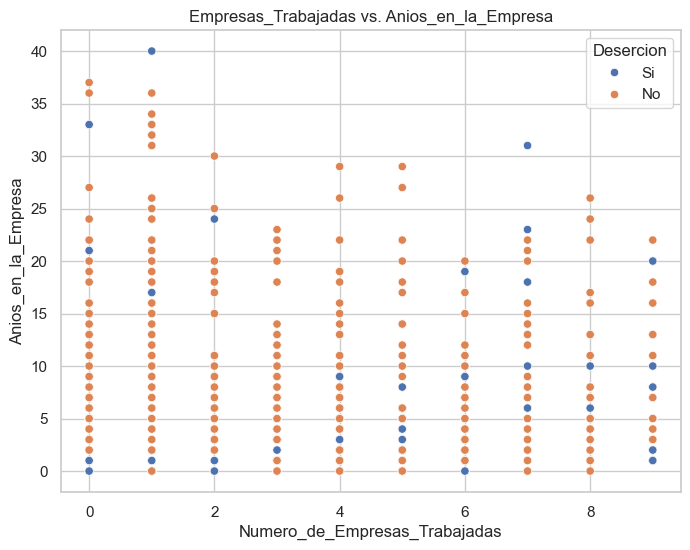

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos,  x='Numero_de_Empresas_Trabajadas',y='Anios_en_la_Empresa', hue='Desercion')
plt.title('Empresas_Trabajadas vs. Anios_en_la_Empresa')
plt.show()

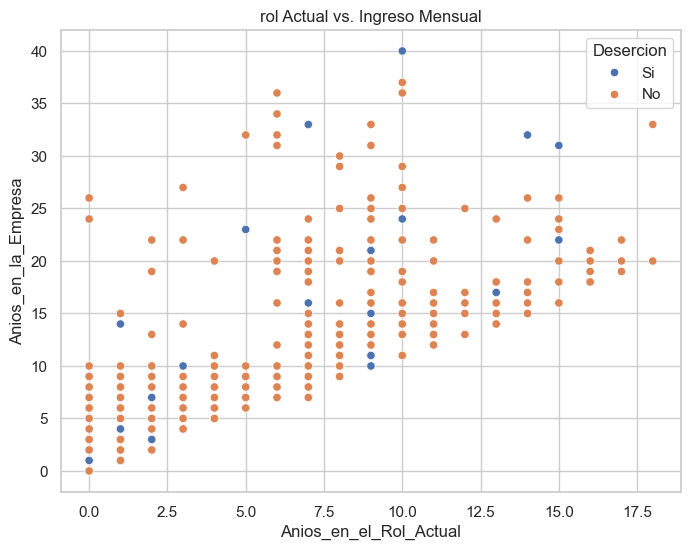

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos,  x='Anios_en_el_Rol_Actual',y='Anios_en_la_Empresa', hue='Desercion')
plt.title('rol Actual vs. Ingreso Mensual')
plt.show()

En los graficos se observa que la deserción parece estar distribuida en todo el rango de valores y  no es lineal.

### Diagramas de Caja para Variables Categóricas
Para las variables categóricas, es importante analizar cuántas categorías hay y cuál es la distribución de los datos en cada categoría.

Visualizar la distribución de variables numéricas a través de categorías, donde se observa que la caja azul concentra la mayor parte de los valores y los puntos son vaolres aislados.

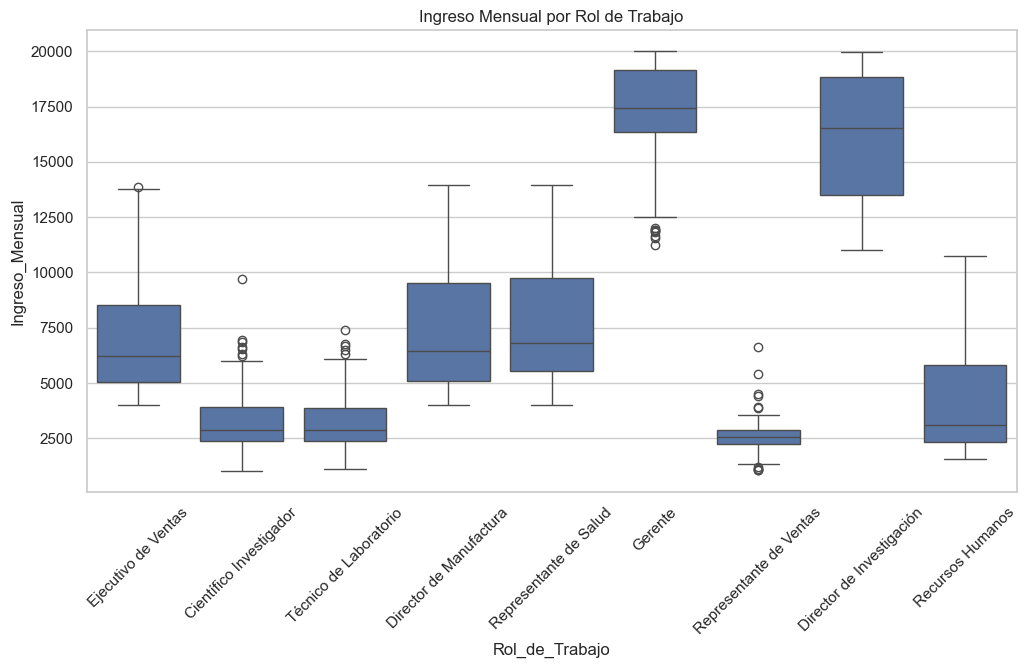

In [72]:
# Diagrama de caja de 'Ingreso Mensual' por 'Rol de trabajo'
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos, x='Rol_de_Trabajo', y='Ingreso_Mensual')
plt.title('Ingreso Mensual por Rol de Trabajo')
plt.xticks(rotation=45)
plt.show()

1. Se observa variabilidad en los Ingresos: Existe una gran variabilidad en los ingresos entre los diferentes roles.
2. Salarios más altos, con roles de Gerente y Director de Investigación muestran los salarios más altos. Estos roles asumen mayor responsabilidad y   requieren habilidades más especializadas y suelen estar mejor remunerados
3. Salarios mas bajos, con roles de Técnico de Laboratorio y Representante de Ventas muestran los salarios más bajos. Esto podría indicar que estos roles requieren menos experiencia o educación, o que están asociados a menores niveles de responsabilidad.
4. Valores atípicos: Se observa  que existen algunos empleados en ciertos roles que ganan significativamente más o menos que el resto de sus colegas. Esto podría deberse a factores como antigüedad, desempeño individual, negociaciones salariales o bonificaciones especiales.


### Comprobando el Equilibrio de los Datos
Para tareas de clasificación, es importante verificar si la variable objetivo está equilibrada.nos referimos a que las diferentes categorías o clases de esa variable están representadas de manera más o menos equitativa en el conjunto de datos.

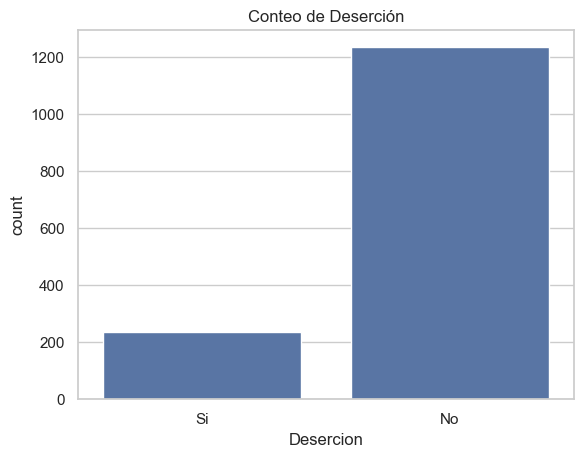

In [73]:
# Gráfico de conteo para la variable objetivo 'Desercion'
sns.countplot(data=datos, x='Desercion')
plt.title('Conteo de Deserción')
plt.show()

Se observa que la variable categorica Desersión  no esta equilibrada.

In [74]:
# Se observa por cantidad la  distribución de la columna Desercion
attrition_counts = datos['Desercion'].value_counts()
print(attrition_counts)

Desercion
No    1233
Si     237
Name: count, dtype: int64


### Conteos de Variables Categóricas
Ahora analizaremos las variables categóricas y veremos sus conteos y cómo se distribuyen los conteos de empleados.


In [75]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Edad                               1470 non-null   int64  
 1   Desercion                          1470 non-null   object 
 2   Viaje_de_Negocios                  1470 non-null   object 
 3   Tarifa_Diaria                      1470 non-null   int64  
 4   Departamento                       1470 non-null   object 
 5   Distancia_desde_el_Hogar           1470 non-null   float64
 6   Educacion                          1470 non-null   int64  
 7   Campo_de_Educacion                 1470 non-null   object 
 8   Numero_de_Empleado                 1470 non-null   int64  
 9   Satisfaccion_con_el_Entorno        1470 non-null   int64  
 10  Genero                             1470 non-null   object 
 11  Tarifa_por_Hora                    1470 non-null   int64

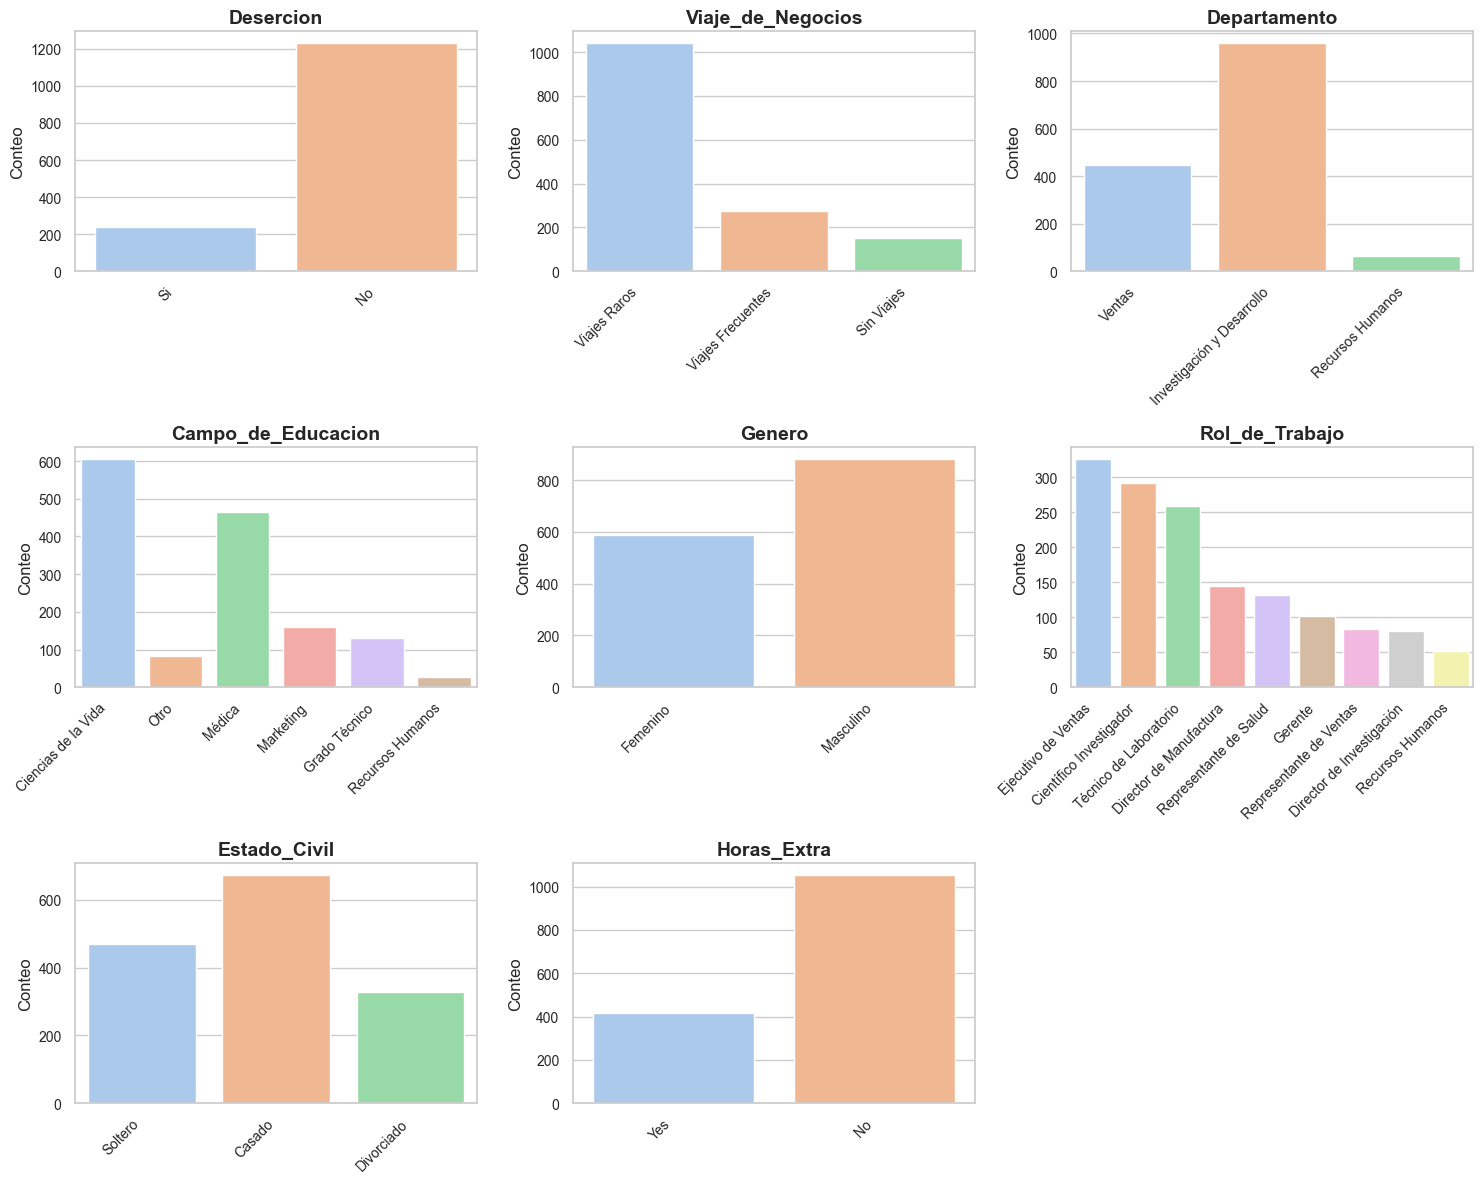

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el estilo de Seaborn
sns.set(style="whitegrid")

# Listar las columnas categóricas
categorical_columns = datos.select_dtypes(include=['object', 'category']).columns

# Crear gráficos para cada columna categórica
plt.figure(figsize=(15, 12))  # Tamaño de figura más grande para mayor claridad
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Ajusta el número de filas y columnas según sea necesario

    # Crear el gráfico pasando el hue como la misma columna y aplicando la paleta
    sns.countplot(data=datos, x=column, hue=column, palette="pastel", dodge=False)
    plt.title(column, fontsize=14, weight='bold')  # Títulos en negrita
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Mejor legibilidad
    plt.yticks(fontsize=10)
    plt.xlabel('')  # Eliminar etiqueta del eje x para un aspecto más limpio
    plt.ylabel('Conteo', fontsize=12)

# Ajustar el diseño para un ajuste adecuado
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Resumen de los observado : 

1. Deserción: La mayoría de los empleados no han desertado.
2. La mayoría de los empleados realizan viajes frecuentes.
3. Los departamentos de Ventas e Investigación y Desarrollo tienen el mayor número de empleados.Recursos Humanos tiene el menor número de empleados.
4. La mayoría de los empleados tienen estudios en Ciencias de la Vida.
5. Existe una representación casi equitativa entre hombres y mujeres.
6. Los roles de Ejecutivo de Ventas y Técnico de Laboratorio tienen una mayor representación.
7. La mayoría de los empleados son casados.
8. La mayoría de los empleados realizan horas extra.

## Distribuciones Coloreadas por Deserción

También podemos colorear las distribuciones mostradas anteriormente por una variable categórica. En este caso, colorearemos por **Deserción** ya que será nuestra variable objetivo. Algo de esto se vio en las diagonales del gráfico de pares mostrado anteriormente.

Además, agregamos una línea negra que muestra el porcentaje de empleados que han desertado a lo largo de las variables numéricas. Esto ayuda a dar una visión general de cómo cambia el % de Deserción a lo largo del rango de las características numéricas. El eje y en el lado derecho del gráfico muestra el porcentaje.


In [77]:
numeric_cols = list(datos.select_dtypes(include=np.number).columns)  #columnas numericas

fig_rows = 8
fig_cols = 4
fig = tls.make_subplots(rows=fig_rows, cols=fig_cols,
                         subplot_titles=tuple(numeric_cols)); #Se crea una figura con múltiples subplots (pequeños gráficos dentro de un gráfico más grande) utilizando make_subplots
curr_row = 1
curr_col = 1
for i, col in enumerate(numeric_cols):
    trace1 = go.Histogram(name = "No Desercion",
                           marker=dict( line=dict(color='black',width=1)),
                           x = list(datos[datos['Desercion'] == 'No'][col]),
                           opacity=0.5) # histograma para la clase "No Desercion"
    trace2 = go.Histogram(name = 'Si Desercion',
                           marker=dict(line=dict(color='black',width=1)),
                           x = datos[datos['Desercion'] == 'Si'][col],
                           opacity=0.5) # histograma para la clase "Si Desercion"
    tmp3 = pd.DataFrame(pd.crosstab(datos[col],
                                     datos['Desercion'].replace('Si',1).replace('No',0)))
    tmp3['Dese%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100  # Cálculo de Porcentaje de Deserción
    extra_yAxis = 'y' + str(fig_rows * fig_cols + i+1)
    trace3 = go.Scatter(x=tmp3.index, y=tmp3['Dese%'],
                         yaxis = extra_yAxis, name='%Desercion', opacity = .8,
                         marker=dict(color='black', line=dict(color='black', width=0.5)))

    fig.append_trace(trace1, curr_row, curr_col) # se agregan los trazos a la figura
    fig.append_trace(trace2, curr_row, curr_col) # se agregan los trazos a la figura

    fig.append_trace(trace3, curr_row, curr_col)
    fig['data'][-1].update(yaxis=extra_yAxis)
    yaxisStr = ''
    if curr_col == fig_cols:
        yaxisStr = '% Desercion'
    fig['layout']['yaxis' + str(fig_rows * fig_cols + i+1)] = dict(range=[0, max(tmp3['Dese%'])+10],
                                                               showgrid=True, overlaying='y'+str(i+1), anchor='x'+str(i+1), side='right',
                                                               title=yaxisStr)
    curr_col += 1
    if curr_col >= fig_cols + 1:
        curr_row += 1
        curr_col = 1

fig['layout'].update(title='Distribucion numerica coloreado por la deserción', width=1300, height=1300,
                      barmode='overlay', showlegend=False, font=dict(size=10))

#py.iplot(fig)
pio.show(fig)

c:\Users\luisf\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

C:\Users\luisf\AppData\Local\Temp\ipykernel_21500\3987235602.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\luisf\AppData\Local\Temp\ipykernel_21500\3987235602.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\luisf\AppData\Local\Temp\ipykernel_21500\3987235602.py:19: FutureWarning:

Downcasting behav

1. Se observa que Jóvenes y adultos : Los grupos de edad más jóvenes y los más mayores podrían tener tasas de deserción ligeramente superiores. Esto podría deberse a diferentes factores como la búsqueda de nuevas oportunidades en los jóvenes o la cercanía a la jubilación en los adultos .

2. Nivel de trabajo, porcentaje de aumento salarial, evaluación de desempeño: Estas variables podrían estar relacionadas con las oportunidades de crecimiento y desarrollo dentro de la empresa. Una baja percepción de oportunidades de crecimiento podría aumentar la probabilidad de deserción.

Hay algunas observaciones extrañas a medida que disminuye el número de empleados para un rango particular. Por ejemplo, hay un empleado con deserción que tiene 40 años de trabajo en total (y ningún otro empleado en ese rango), lo que resulta en un porcentaje de deserción del '100%' para ese rango. Esto puede ser engañoso.

### Validemos con otros graficos las conclusiones generadas.

1. Los empleados más jóvenes (Edad) tienden a tener tasas de deserción más altas.

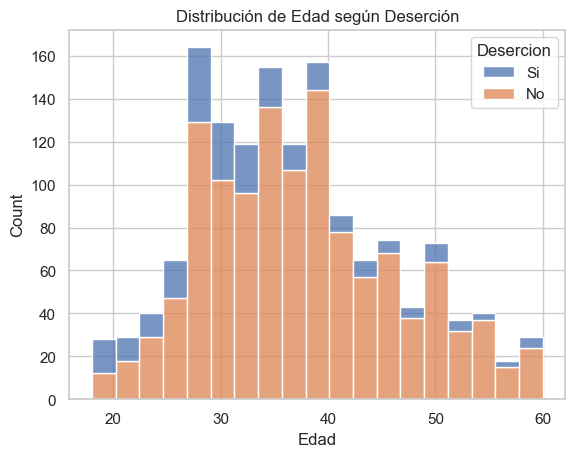

In [78]:
# Distribución de empleados por edad y deserción
sns.histplot(data=datos, x='Edad', hue='Desercion', multiple='stack')
plt.title('Distribución de Edad según Deserción')
plt.show()


Características relacionadas con los años (Años Totales de Trabajo, Años con el Gerente Actual, Años en la Empresa, etc.) muestran una tendencia general a la baja con respecto a las tasas de deserción. En otras palabras, las personas con menos años tienen porcentajes de deserción más altos.

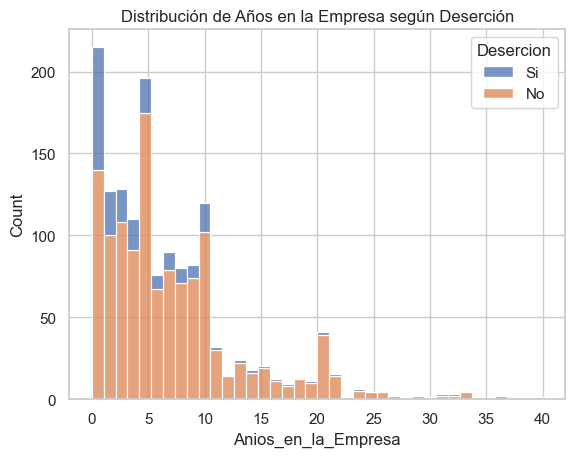

In [79]:
# Distribución de empleados por edad y deserción
sns.histplot(data=datos, x='Anios_en_la_Empresa', hue='Desercion', multiple='stack')
plt.title('Distribución de Años en la Empresa según Deserción')
plt.show()


características basadas en encuestas (Participación en el Trabajo, Balance de Vida Laboral, Satisfacción Laboral, etc.) tienden a tener porcentajes de deserción más altos cuanto menor es la puntuación del empleado.

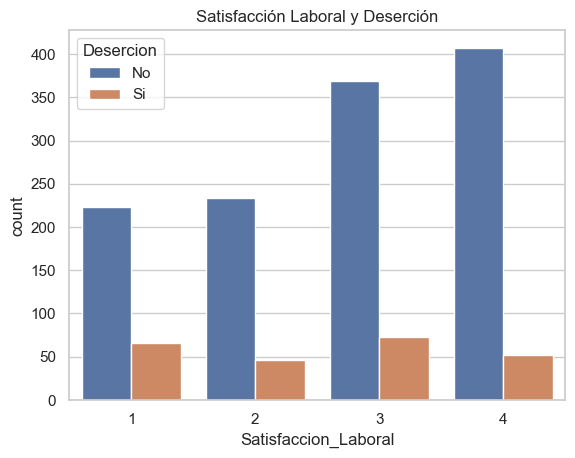

In [80]:
# Relación entre satisfacción laboral y deserción
sns.countplot(data=datos, x='Satisfaccion_Laboral', hue='Desercion')
plt.title('Satisfacción Laboral y Deserción')
plt.show()

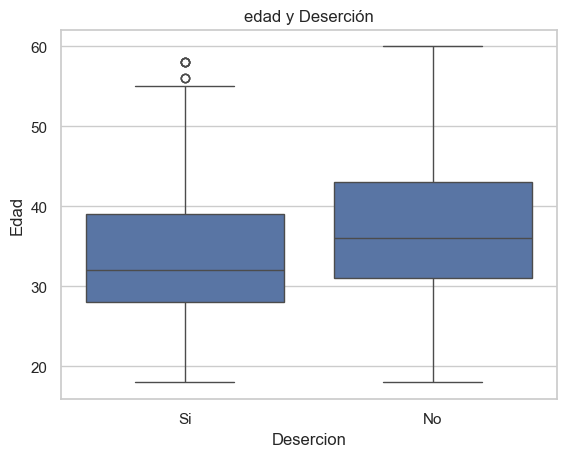

In [81]:
# Relación entre ingresos mensuales y deserción
sns.boxplot(data=datos, x='Desercion', y='Edad')
plt.title('edad y Deserción')
plt.show()

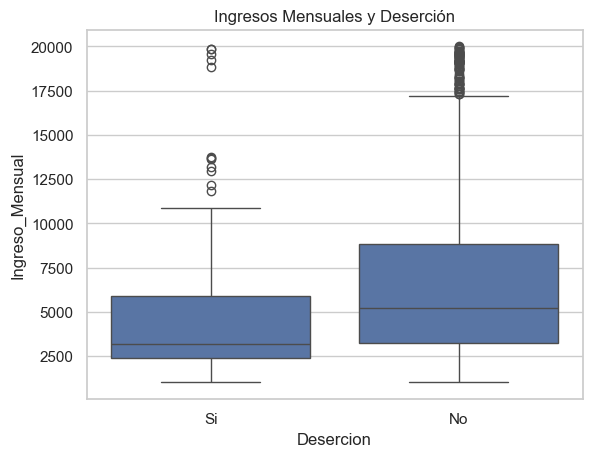

In [82]:

# Relación entre ingresos mensuales y deserción
sns.boxplot(data=datos, x='Desercion', y='Ingreso_Mensual')
plt.title('Ingresos Mensuales y Deserción')
plt.show()


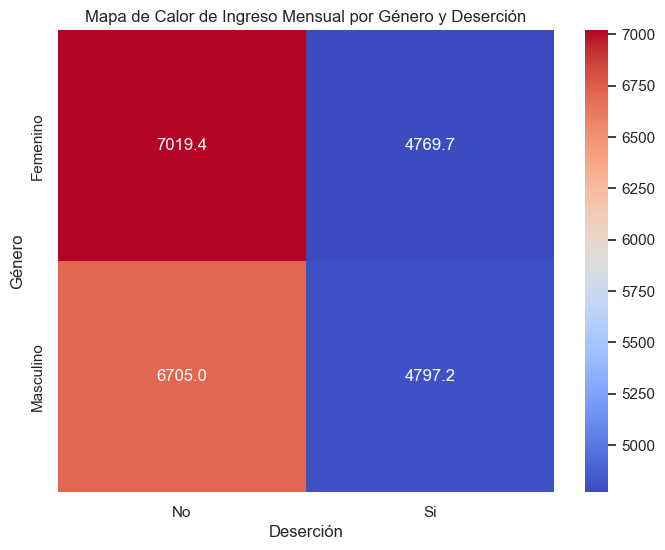

In [83]:
# Agrupar por Sexo y Deserción, y calcular el Ingreso Mensual promedio
pivot_data = datos.pivot_table(values='Ingreso_Mensual', index='Genero', columns='Desercion', aggfunc='mean')

# Crear el gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.1f')

# Configuración del gráfico
plt.title('Mapa de Calor de Ingreso Mensual por Género y Deserción')
plt.xlabel('Deserción')
plt.ylabel('Género')
plt.show()


1. Brecha salarial de género: En general, las mujeres que no desertan tienen un ingreso mensual significativamente más alto que los hombres que tampoco desertan. Esto sugiere una persistente brecha salarial de género, incluso cuando se controla por el factor de deserción.
2. Impacto de la deserción en los ingresos: Tanto para hombres como para mujeres, la deserción se asocia con una disminución considerable en los ingresos mensuales. 

Grafico de deserciones por departamento

In [84]:
#print(datos['Departamento'].unique())

# Se filtra solo las filas donde 'Deserción' es "Sí"
datos_si = datos[datos['Desercion'] == 'Sí']

# Se agrupan por 'Departamento' y se cuentan la cantidad ´por 'Deserción'
sector_solo_si = datos_si.groupby('Departamento')['Desercion'].value_counts()

# Mostrar los resultados
sector_solo_si

Series([], Name: count, dtype: int64)

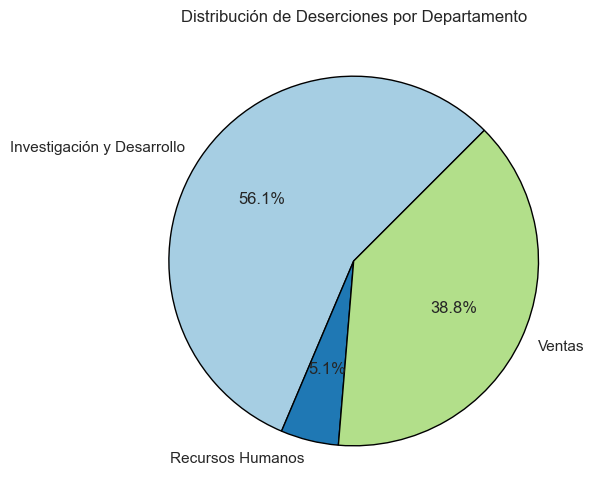

In [85]:
import matplotlib.pyplot as plt

# Filtrar solo las filas donde 'Deserción' es "Sí"
datos_si = datos[datos['Desercion'] == 'Si']

# Agrupar por 'Departamento' y contar la cantidad de deserciones
# size(): Agrupa las filas por el valor de Departamento y cuenta cuántas filas tiene cada departamento
#(es decir, cuántos casos de deserción hay en cada uno).
sector_solo_si = datos_si.groupby('Departamento').size()

# se crea  el gráfico circular
plt.figure(figsize=(8, 6))
sector_solo_si.plot.pie(
    startangle=45,
    autopct="%.1f%%",
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)

# Añadir título y etiquetas
plt.title("Distribución de Deserciones por Departamento")
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()  # Mostrar el gráfico


#Porcentaje de desercion con respecto a la edad y comparacion de desercion si o no segun edad

In [86]:
tmp1 = datos[(datos['Desercion'] == 'Si')]
tmp2 = datos[(datos['Desercion'] == 'No')]
tmp3 = pd.DataFrame(pd.crosstab(datos['Edad'],datos['Desercion']), )

tmp3['Des%'] = tmp3['Si'] / (tmp3['Si'] + tmp3['No']) * 100




In [87]:
trace1 = go.Bar(
        x=tmp1['Edad'].value_counts().keys().tolist(),
        y=tmp1['Edad'].value_counts().values.tolist(),
        name='Si_Desercion',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))


trace2 = go.Bar(
        x=tmp2['Edad'].value_counts().keys().tolist(),
        y=tmp2['Edad'].value_counts().values.tolist(),
        name='No_Desercion', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))

trace3 =  go.Scatter(
        x=tmp3.index,
        y=tmp3['Des%'],
        yaxis = 'y2',
        name='% Desercion', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

In [88]:
layout = dict(title =  str('Edad'),
              xaxis=dict(),
              yaxis=dict(title= 'Count'),
              yaxis2=dict(range= [-0, 75],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= '% Desercion'
                         ))

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
pio.show(fig)


El análisis del conjunto de información revela varias conclusiones clave sobre la relación entre diferentes aspectos laborales y la deserción de empleados:

1. **Satisfacción y cargos**: Las personas más jóvenes, a pesar de ocupar cargos más altos, tienden a estar menos satisfechas con su trabajo. Esto sugiere que la edad y el nivel de satisfacción pueden estar inversamente relacionados, aunque no de forma lineal.

2. **Tiempo en la empresa y promociones**: Los empleados que llevan más tiempo en la empresa suelen haber permanecido en el mismo puesto durante largos períodos y haber sido promovidos hace más tiempo, lo que puede influir en su percepción de las oportunidades de crecimiento.

3. **Ingresos y desempeño**: Aquellos empleados que han recibido mejores evaluaciones y aumentos salariales tienden a tener ingresos más altos. Esto indica que el desempeño y la recompensa están estrechamente conectados.

4. **Variabilidad de ingresos**: Existe una gran variabilidad en los ingresos, donde los roles de mayor responsabilidad, como Gerente y Director de Investigación, tienen los salarios más altos, mientras que los roles de Técnico de Laboratorio y Representante de Ventas reciben los salarios más bajos. Los valores atípicos en ciertos roles sugieren que factores como la antigüedad o las bonificaciones especiales pueden generar diferencias salariales significativas.

5. **Deserción**: Aunque la mayoría de los empleados no han desertado, las tasas de deserción son ligeramente más altas entre los grupos de edad más jóvenes y los más mayores. Los primeros podrían estar en búsqueda de nuevas oportunidades, mientras que los segundos podrían estar más cerca de la jubilación. Además, las personas con menos años en la empresa muestran una mayor tendencia a desertar.

6. **Factores relacionados con el crecimiento**: Variables como el nivel de trabajo, el porcentaje de aumento salarial y la evaluación de desempeño parecen estar ligadas a las oportunidades de desarrollo dentro de la empresa. Una baja percepción de estas oportunidades podría incrementar la probabilidad de deserción.

7. **Encuestas y satisfacción laboral**: Los resultados de encuestas sobre participación, balance de vida laboral y satisfacción muestran que las tasas de deserción son más altas cuando los empleados otorgan puntuaciones más bajas a estos aspectos.

8. **Brecha salarial de género**: Existe una brecha salarial de género persistente, donde las mujeres que no desertan ganan significativamente más que los hombres en la misma condición. Este patrón sugiere una desigualdad salarial que prevalece, incluso considerando la deserción.

9. **Impacto de la deserción en los ingresos**: Tanto en hombres como en mujeres, la deserción se asocia con una caída considerable en los ingresos mensuales, lo que evidencia el impacto financiero negativo de dejar la empresa.

En resumen, los factores que influyen en la deserción son diversos, desde la antigüedad y el nivel de satisfacción hasta las oportunidades de crecimiento y las desigualdades salariales. Identificar estos patrones puede ser clave para desarrollar estrategias de retención más efectivas.